# July 2018 - RideShare Data

## Data Description

Provided by the San Diego County Regional Airport Authority (SDCRAA), the RideShare data set includes the aggregated trip data and details from all the RideShare transportation operators at San Diego International Airport (SAN) from July 2018.  The data set includes:
-Pickup/Drop-off details such as date, time, and GPS coordinates
-Entry date and time into Airport’s Geofence
-Exit date and time out of Airport’s Geofence
-Year, make, model, and last 3-4 digits of license plate of the vehicle
-Miles per gallon
-Matching and re-matching information
-Terminal

## Background Information

The purpose of this project is to analyze the Rideshare trip data for SAN in order to:
-Visualize the aggregated Rideshare activity by hour and day on Airport property
-Visualize the pickup and dropoff distribution on a map

With this analysis, it is our hope that we can provide valuable information that can help improve and optimize existing ground transportation operations and provide a closer step to a “quantified” understanding on how Rideshare is impacting other transportation modes (such as Taxicab, Off-Airport Parking, Rent-A-Car, etc.), traffic flow, and overall operations.

## Project Deliverables

This project will include:
-Separate the terminals into 3 data sets
-Aggregate the data into hour and day of the week segments
-Pickups and dropoffs in the 2-3 PM hour on Tuesdays for Terminal 1
-Bar charts comparing the pickup and drop off levels
-Scatterplot visualization comparing pickup and dropoff levels

In [160]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#Read in the July 2018 Rideshare data set
july2018 = pd.read_csv('2018-07_TNC.csv')

C:\Users\imc\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [466]:
july2018 #Look over the data set

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
0,1,pickup,2018-07-01 00:00:00,2018-06-30 23:53:00,2018-07-01 00:04:00,32.731037,-117.202952,423,2015,toyota,prius,48.0,no,no,no,NaN,T2,Saturday,23.0
1,2,pickup,2018-07-01 00:00:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731016,-117.202380,1++,2017,toyota,prius,52.0,no,no,no,NaN,T2,Saturday,23.0
2,3,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
3,4,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
4,5,pickup,2018-07-01 00:00:00,2018-06-30 23:55:00,2018-07-01 00:05:00,32.731006,-117.202724,619,2017,toyota,camry,26.0,no,no,no,NaN,T2,Saturday,23.0
5,6,pickup,2018-07-01 00:01:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731040,-117.202674,505,2013,mitsubishi,outlander sport,26.0,no,no,no,NaN,T2,Saturday,23.0
6,7,pickup,2018-07-01 00:01:00,2018-06-30 23:48:00,2018-07-01 00:05:00,32.731028,-117.203400,91,2015,ford,focus,38.0,no,no,no,NaN,T2,Saturday,23.0
7,8,pickup,2018-07-01 00:01:00,2018-06-30 23:49:00,2018-07-01 00:05:00,32.731885,-117.197684,739,2013,toyota,prius,48.0,no,no,no,NaN,T1,Saturday,23.0
8,9,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:05:00,32.731151,-117.203142,318,2015,hyundai,elantra,29.0,no,no,no,NaN,T2,Saturday,23.0
9,10,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:10:00,32.731027,-117.203020,OXY,2016,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0


In [467]:
july2018.dtypes #Look at the data types

Trip Counter                      int64
Transaction Type                 object
PickupDropoffDateTime    datetime64[ns]
EntryDateTime            datetime64[ns]
ExitDateTime             datetime64[ns]
Latitude                        float64
Longitude                       float64
License Plate                    object
Vehicle Year                      int64
Vehicle Make                     object
Vehicle Model                    object
MPG                             float64
Multi-party Trip                 object
MatchedRide                      object
Is Rematch                       object
NumberOfParties                 float64
Terminal                         object
Weekday                          object
Hour                            float64
dtype: object

### Convert EntryDateTime, ExitDateTime, and PickupDropoffDateTime to datetime formats

In [468]:
july2018['EntryDateTime'] = pd.to_datetime(july2018['EntryDateTime'])

In [469]:
july2018['ExitDateTime'] = pd.to_datetime(july2018['ExitDateTime'])

In [470]:
july2018['PickupDropoffDateTime'] = pd.to_datetime(july2018['PickupDropoffDateTime'])

In [471]:
#verify conversion from objects to dateime formats
july2018.dtypes

Trip Counter                      int64
Transaction Type                 object
PickupDropoffDateTime    datetime64[ns]
EntryDateTime            datetime64[ns]
ExitDateTime             datetime64[ns]
Latitude                        float64
Longitude                       float64
License Plate                    object
Vehicle Year                      int64
Vehicle Make                     object
Vehicle Model                    object
MPG                             float64
Multi-party Trip                 object
MatchedRide                      object
Is Rematch                       object
NumberOfParties                 float64
Terminal                         object
Weekday                          object
Hour                            float64
dtype: object

### Let's add a 'weekday' and 'hour' columns to the data set with weekday corresponded to the EntryDateTime.

In [472]:
Weekday = july2018['EntryDateTime'].dt.weekday_name

In [168]:
Weekday

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
5         Saturday
6         Saturday
7         Saturday
8         Saturday
9         Saturday
10        Saturday
11        Saturday
12        Saturday
13        Saturday
14        Saturday
15        Saturday
16        Saturday
17        Saturday
18        Saturday
19        Saturday
20        Saturday
21        Saturday
22        Saturday
23        Saturday
24        Saturday
25        Saturday
26        Saturday
27        Saturday
28        Saturday
29        Saturday
            ...   
359612     Tuesday
359613     Tuesday
359614     Tuesday
359615     Tuesday
359616     Tuesday
359617     Tuesday
359618     Tuesday
359619     Tuesday
359620     Tuesday
359621     Tuesday
359622     Tuesday
359623     Tuesday
359624     Tuesday
359625     Tuesday
359626     Tuesday
359627     Tuesday
359628     Tuesday
359629     Tuesday
359630     Tuesday
359631     Tuesday
359632     Tuesday
359633     T

In [473]:
july2018['Weekday'] = Weekday #Add 'Weekday' column

In [474]:
july2018 #check to make sure new Weekday column was added

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
0,1,pickup,2018-07-01 00:00:00,2018-06-30 23:53:00,2018-07-01 00:04:00,32.731037,-117.202952,423,2015,toyota,prius,48.0,no,no,no,NaN,T2,Saturday,23.0
1,2,pickup,2018-07-01 00:00:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731016,-117.202380,1++,2017,toyota,prius,52.0,no,no,no,NaN,T2,Saturday,23.0
2,3,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
3,4,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
4,5,pickup,2018-07-01 00:00:00,2018-06-30 23:55:00,2018-07-01 00:05:00,32.731006,-117.202724,619,2017,toyota,camry,26.0,no,no,no,NaN,T2,Saturday,23.0
5,6,pickup,2018-07-01 00:01:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731040,-117.202674,505,2013,mitsubishi,outlander sport,26.0,no,no,no,NaN,T2,Saturday,23.0
6,7,pickup,2018-07-01 00:01:00,2018-06-30 23:48:00,2018-07-01 00:05:00,32.731028,-117.203400,91,2015,ford,focus,38.0,no,no,no,NaN,T2,Saturday,23.0
7,8,pickup,2018-07-01 00:01:00,2018-06-30 23:49:00,2018-07-01 00:05:00,32.731885,-117.197684,739,2013,toyota,prius,48.0,no,no,no,NaN,T1,Saturday,23.0
8,9,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:05:00,32.731151,-117.203142,318,2015,hyundai,elantra,29.0,no,no,no,NaN,T2,Saturday,23.0
9,10,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:10:00,32.731027,-117.203020,OXY,2016,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0


In [475]:
Hour = july2018['EntryDateTime'].dt.hour

In [476]:
july2018['Hour'] = Hour #Add 'Hour' column

In [477]:
july2018 #check to make sure 'Hour' column was added

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
0,1,pickup,2018-07-01 00:00:00,2018-06-30 23:53:00,2018-07-01 00:04:00,32.731037,-117.202952,423,2015,toyota,prius,48.0,no,no,no,NaN,T2,Saturday,23.0
1,2,pickup,2018-07-01 00:00:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731016,-117.202380,1++,2017,toyota,prius,52.0,no,no,no,NaN,T2,Saturday,23.0
2,3,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
3,4,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
4,5,pickup,2018-07-01 00:00:00,2018-06-30 23:55:00,2018-07-01 00:05:00,32.731006,-117.202724,619,2017,toyota,camry,26.0,no,no,no,NaN,T2,Saturday,23.0
5,6,pickup,2018-07-01 00:01:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731040,-117.202674,505,2013,mitsubishi,outlander sport,26.0,no,no,no,NaN,T2,Saturday,23.0
6,7,pickup,2018-07-01 00:01:00,2018-06-30 23:48:00,2018-07-01 00:05:00,32.731028,-117.203400,91,2015,ford,focus,38.0,no,no,no,NaN,T2,Saturday,23.0
7,8,pickup,2018-07-01 00:01:00,2018-06-30 23:49:00,2018-07-01 00:05:00,32.731885,-117.197684,739,2013,toyota,prius,48.0,no,no,no,NaN,T1,Saturday,23.0
8,9,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:05:00,32.731151,-117.203142,318,2015,hyundai,elantra,29.0,no,no,no,NaN,T2,Saturday,23.0
9,10,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:10:00,32.731027,-117.203020,OXY,2016,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0


### Verify the shape of the data set and the important columns

In [478]:
july2018.shape

(359642, 19)

In [479]:
july2018['EntryDateTime'].shape

(359642,)

In [480]:
july2018['Weekday'].shape

(359642,)

In [481]:
july2018['Hour'].shape

(359642,)

### Lets separate the data set by Terminal 1 (T1), Terminal 2 (T2), and Rental Car Center (RCC).

In [482]:
T1 = july2018[july2018['Terminal'] == 'T1']

In [483]:
T1 #verify T1 data

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
7,8,pickup,2018-07-01 00:01:00,2018-06-30 23:49:00,2018-07-01 00:05:00,32.731885,-117.197684,739,2013,toyota,prius,48.0,no,no,no,NaN,T1,Saturday,23.0
22,23,pickup,2018-07-01 00:05:00,2018-06-30 23:45:00,2018-07-01 00:09:00,32.731855,-117.197767,763,2013,ford,fusion,30.0,no,no,no,NaN,T1,Saturday,23.0
25,26,pickup,2018-07-01 00:06:00,2018-06-30 23:32:00,2018-07-01 00:09:00,32.732073,-117.197840,104,2017,nissan,rogue,31.0,no,no,no,NaN,T1,Saturday,23.0
31,32,pickup,2018-07-01 00:10:00,2018-07-01 00:04:00,2018-07-01 00:15:00,32.732075,-117.197850,393,2008,honda,odyssey,19.0,no,no,no,NaN,T1,Sunday,0.0
32,33,pickup,2018-07-01 00:11:00,2018-06-30 23:54:00,2018-07-01 00:15:00,32.732016,-117.197596,802,2017,toyota,sienna,21.0,no,no,no,NaN,T1,Saturday,23.0
34,35,pickup,2018-07-01 00:11:00,2018-07-01 00:00:00,2018-07-01 00:16:00,32.732057,-117.197773,9R1,2014,toyota,sienna,20.0,no,no,no,NaN,T1,Sunday,0.0
39,40,pickup,2018-07-01 00:13:00,2018-07-01 00:02:00,2018-07-01 00:17:00,32.731869,-117.197681,520,2016,chevrolet,malibu,28.0,no,no,no,NaN,T1,Sunday,0.0
44,45,pickup,2018-07-01 00:14:00,2018-07-01 00:07:00,2018-07-01 00:17:00,32.732028,-117.197650,296,2008,hyundai,elantra,28.0,no,no,yes,NaN,T1,Sunday,0.0
45,46,pickup,2018-07-01 00:14:00,2018-07-01 00:04:00,2018-07-01 00:17:00,32.731894,-117.197733,208,2010,toyota,prius,50.0,no,no,no,NaN,T1,Sunday,0.0
47,48,pickup,2018-07-01 00:14:00,2018-07-01 00:03:00,2018-07-01 00:18:00,32.732023,-117.197628,LER,2015,toyota,camry,27.0,no,no,no,NaN,T1,Sunday,0.0


In [181]:
T2 = july2018[july2018['Terminal'] == 'T2']

In [182]:
T2 #verify T2 data

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
0,1,pickup,2018-07-01 00:00:00,2018-06-30 23:53:00,2018-07-01 00:04:00,32.731037,-117.202952,423,2015,toyota,prius,48.0,no,no,no,NaN,T2,Saturday,23.0
1,2,pickup,2018-07-01 00:00:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731016,-117.202380,1++,2017,toyota,prius,52.0,no,no,no,NaN,T2,Saturday,23.0
2,3,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
3,4,pickup,2018-07-01 00:00:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731030,-117.203187,841,2015,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
4,5,pickup,2018-07-01 00:00:00,2018-06-30 23:55:00,2018-07-01 00:05:00,32.731006,-117.202724,619,2017,toyota,camry,26.0,no,no,no,NaN,T2,Saturday,23.0
5,6,pickup,2018-07-01 00:01:00,2018-06-30 23:56:00,2018-07-01 00:05:00,32.731040,-117.202674,505,2013,mitsubishi,outlander sport,26.0,no,no,no,NaN,T2,Saturday,23.0
6,7,pickup,2018-07-01 00:01:00,2018-06-30 23:48:00,2018-07-01 00:05:00,32.731028,-117.203400,91,2015,ford,focus,38.0,no,no,no,NaN,T2,Saturday,23.0
8,9,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:05:00,32.731151,-117.203142,318,2015,hyundai,elantra,29.0,no,no,no,NaN,T2,Saturday,23.0
9,10,pickup,2018-07-01 00:01:00,2018-06-30 23:53:00,2018-07-01 00:10:00,32.731027,-117.203020,OXY,2016,nissan,sentra,31.0,yes,yes,no,NaN,T2,Saturday,23.0
10,11,pickup,2018-07-01 00:01:00,2018-06-30 23:51:00,2018-07-01 00:05:00,32.731065,-117.203227,446,2016,toyota,prius,52.0,no,no,no,NaN,T2,Saturday,23.0


In [484]:
RCC = july2018[july2018['Terminal'] == 'RCC']

In [485]:
#verify number of rows f#verify number of rows fRCC #verify RCC data

In [486]:
#Verify number of rows for RCC
RCC.shape

(8768, 19)

In [487]:
#Verify nunber of rows for T1
T1.shape

(110923, 19)

In [488]:
T2.shape

(118491, 19)

### This totals about 238,182 rows, and the data set is 359,642 rows.  The other area is labeled as Other.  Let's verify how many rows Other is.

In [489]:
july2018[july2018['Terminal'] == 'Other'].shape

(121460, 19)

### When you add RCC, T1, T2, and Other, we get the 359,642 rows, so every row is accounted for.  This also means that 121,460 rows occurred in other areas of the Airport which means these dropoffs and pickups are occurring in nondesignated areas of the Airport.

### Lets graph pickups and drop offs by RCC, T1, and T2.  We will need to aggregate entries by Transaction Type and Weekday and then again by Transaction Type and Hour first

In [490]:
RCC1 = RCC.loc[:,['Transaction Type','EntryDateTime', 'Weekday']]
RCC2 = RCC.loc[:,['Transaction Type','EntryDateTime', 'Hour']]

T1_1 = T1.loc[:,['Transaction Type','EntryDateTime', 'Weekday']]
T1_2 = T1.loc[:,['Transaction Type','EntryDateTime', 'Hour']]

T2_1 = T2.loc[:,['Transaction Type','EntryDateTime', 'Weekday']]
T2_2 = T2.loc[:,['Transaction Type','EntryDateTime', 'Hour']]

In [491]:
RCC1 #Verify Transaction Type and Weekday grouping for RCC

,Transaction Type,EntryDateTime,Weekday
42,pickup,2018-07-01 00:12:00,Sunday
46,pickup,2018-07-01 00:12:00,Sunday
50,pickup,2018-07-01 00:11:00,Sunday
77,pickup,2018-07-01 00:24:00,Sunday
88,pickup,2018-07-01 00:57:00,Sunday
111,pickup,2018-07-01 01:51:00,Sunday
112,pickup,2018-07-01 02:14:00,Sunday
850,pickup,2018-07-01 06:19:00,Sunday
1542,pickup,2018-07-01 08:42:00,Sunday
1767,pickup,2018-07-01 09:16:00,Sunday


In [492]:
RCC2 #Verify Transaction Type and Hour grouping for RCC

,Transaction Type,EntryDateTime,Hour
42,pickup,2018-07-01 00:12:00,0.0
46,pickup,2018-07-01 00:12:00,0.0
50,pickup,2018-07-01 00:11:00,0.0
77,pickup,2018-07-01 00:24:00,0.0
88,pickup,2018-07-01 00:57:00,0.0
111,pickup,2018-07-01 01:51:00,1.0
112,pickup,2018-07-01 02:14:00,2.0
850,pickup,2018-07-01 06:19:00,6.0
1542,pickup,2018-07-01 08:42:00,8.0
1767,pickup,2018-07-01 09:16:00,9.0


In [493]:
T1_1 #Verify Transaction Type and Weekday grouping for T1

,Transaction Type,EntryDateTime,Weekday
7,pickup,2018-06-30 23:49:00,Saturday
22,pickup,2018-06-30 23:45:00,Saturday
25,pickup,2018-06-30 23:32:00,Saturday
31,pickup,2018-07-01 00:04:00,Sunday
32,pickup,2018-06-30 23:54:00,Saturday
34,pickup,2018-07-01 00:00:00,Sunday
39,pickup,2018-07-01 00:02:00,Sunday
44,pickup,2018-07-01 00:07:00,Sunday
45,pickup,2018-07-01 00:04:00,Sunday
47,pickup,2018-07-01 00:03:00,Sunday


In [205]:
T1_2 #Verify Transaction Type and Hour grouping for T1

,Transaction Type,EntryDateTime,Hour
7,pickup,2018-06-30 23:49:00,23.0
22,pickup,2018-06-30 23:45:00,23.0
25,pickup,2018-06-30 23:32:00,23.0
31,pickup,2018-07-01 00:04:00,0.0
32,pickup,2018-06-30 23:54:00,23.0
34,pickup,2018-07-01 00:00:00,0.0
39,pickup,2018-07-01 00:02:00,0.0
44,pickup,2018-07-01 00:07:00,0.0
45,pickup,2018-07-01 00:04:00,0.0
47,pickup,2018-07-01 00:03:00,0.0


In [494]:
T2_1 #Verify Transaction Type and Weekday grouping for T2

,Transaction Type,EntryDateTime,Weekday
0,pickup,2018-06-30 23:53:00,Saturday
1,pickup,2018-06-30 23:56:00,Saturday
2,pickup,2018-06-30 23:51:00,Saturday
3,pickup,2018-06-30 23:51:00,Saturday
4,pickup,2018-06-30 23:55:00,Saturday
5,pickup,2018-06-30 23:56:00,Saturday
6,pickup,2018-06-30 23:48:00,Saturday
8,pickup,2018-06-30 23:53:00,Saturday
9,pickup,2018-06-30 23:53:00,Saturday
10,pickup,2018-06-30 23:51:00,Saturday


In [207]:
T2_2 #Verify Transaction Type and Hour grouping for T2

,Transaction Type,EntryDateTime,Hour
0,pickup,2018-06-30 23:53:00,23.0
1,pickup,2018-06-30 23:56:00,23.0
2,pickup,2018-06-30 23:51:00,23.0
3,pickup,2018-06-30 23:51:00,23.0
4,pickup,2018-06-30 23:55:00,23.0
5,pickup,2018-06-30 23:56:00,23.0
6,pickup,2018-06-30 23:48:00,23.0
8,pickup,2018-06-30 23:53:00,23.0
9,pickup,2018-06-30 23:53:00,23.0
10,pickup,2018-06-30 23:51:00,23.0


In [495]:
#Setup groupings for aggregation

RCC_WeekdayGroup = RCC1.groupby(['Transaction Type', 'Weekday'])
RCC_HourGroup = RCC2.groupby(['Transaction Type', 'Hour'])

T1_WeekdayGroup = T1_1.groupby(['Transaction Type', 'Weekday'])
T1_HourGroup = T1_2.groupby(['Transaction Type', 'Hour'])

T2_WeekdayGroup = T2_1.groupby(['Transaction Type', 'Weekday'])
T2_HourGroup = T2_2.groupby(['Transaction Type', 'Hour'])

In [496]:
RCC_WeekdayGroup
RCC_HourGroup

T1_WeekdayGroup
T1_HourGroup

T2_WeekdayGroup
T2_HourGroup

In [308]:
#Setup the counts by weekday and hour

RCC_CountsByWeekday = RCC_WeekdayGroup.count()
RCC_CountsByHour = RCC_HourGroup.count()

T1_CountsByWeekday = T1_WeekdayGroup.count()
T1_CountsByHour = T1_HourGroup.count()

T2_CountsByWeekday = T2_WeekdayGroup.count()
T2_CountsByHour = T2_HourGroup.count()

In [497]:
RCC_CountsByWeekday #Verify the counts

EntryDateTime
Transaction Type Weekday                 
dropoff          Friday               320
                 Monday               313
                 Saturday             275
                 Sunday               419
                 Thursday             238
                 Tuesday              251
                 Wednesday            148
pickup           Friday               962
                 Monday              1057
                 Saturday             811
                 Sunday              1414
                 Thursday             906
                 Tuesday              878
                 Wednesday            764

In [215]:
RCC_CountsByHour #Verify the counts

EntryDateTime
Transaction Type Hour               
dropoff          0.0               9
                 1.0               6
                 2.0               4
                 3.0              14
                 4.0              27
                 5.0              54
                 6.0              55
                 7.0             105
                 8.0             178
                 9.0             194
                 10.0            199
                 11.0            196
                 12.0            178
                 13.0             94
                 14.0            118
                 15.0             86
                 16.0             80
                 17.0             90
                 18.0             81
                 19.0             69
                 20.0             48
                 21.0             36
                 22.0             28
                 23.0             15
pickup           0.0             159
                 1.0              57
                 2.0              47
                 3.0              21
                 4.0              27
                 5.0              66
                 6.0              70
                 7.0             128
                 8.0             221
                 9.0             281
                 10.0            377
                 11.0            432
                 12.0            393
                 13.0            381
                 14.0            401
                 15.0            415
                 16.0            456
                 17.0            478
                 18.0            464
                 19.0            421
                 20.0            429
                 21.0            451
                 22.0            351
                 23.0            266

In [498]:
T1_CountsByWeekday #Verify the counts

EntryDateTime
Transaction Type Weekday                 
dropoff          Friday              5514
                 Monday              6368
                 Saturday            3108
                 Sunday              5860
                 Thursday            4819
                 Tuesday             4731
                 Wednesday           3773
pickup           Friday             10778
                 Monday             13486
                 Saturday            6916
                 Sunday             13579
                 Thursday           10730
                 Tuesday            10999
                 Wednesday           9675

In [231]:
T1_CountsByHour #Verify the counts

EntryDateTime
Transaction Type Hour               
dropoff          0.0              13
                 1.0              14
                 2.0              13
                 3.0             170
                 4.0            2123
                 5.0            4050
                 6.0            2715
                 7.0            2436
                 8.0            2030
                 9.0            2156
                 10.0           1787
                 11.0           1717
                 12.0           1744
                 13.0           1738
                 14.0           1786
                 15.0           1830
                 16.0           1890
                 17.0           1750
                 18.0           1769
                 19.0           1100
                 20.0            819
                 21.0            454
                 22.0             53
                 23.0             16
pickup           0.0            2007
                 1.0             330
                 2.0             137
                 3.0              55
                 4.0              15
                 5.0             237
                 6.0            1136
                 7.0            3057
                 8.0            5195
                 9.0            4674
                 10.0           4200
                 11.0           3976
                 12.0           3338
                 13.0           3745
                 14.0           4193
                 15.0           4943
                 16.0           3890
                 17.0           4175
                 18.0           5132
                 19.0           4419
                 20.0           4933
                 21.0           4356
                 22.0           3609
                 23.0           4411

In [499]:
T2_CountsByWeekday #Verify the counts

EntryDateTime
Transaction Type Weekday                 
dropoff          Friday              4375
                 Monday              5622
                 Saturday            2867
                 Sunday              5166
                 Thursday            4213
                 Tuesday             4685
                 Wednesday           3539
pickup           Friday             11904
                 Monday             15456
                 Saturday            8722
                 Sunday             15542
                 Thursday           12073
                 Tuesday            12708
                 Wednesday          10981

In [219]:
T2_CountsByHour #Verify the counts

EntryDateTime
Transaction Type Hour               
dropoff          0.0              22
                 1.0              14
                 2.0              20
                 3.0             289
                 4.0            2640
                 5.0            3563
                 6.0            2016
                 7.0            1504
                 8.0            2121
                 9.0            2486
                 10.0           1931
                 11.0           1871
                 12.0           1675
                 13.0           1361
                 14.0           1345
                 15.0           1069
                 16.0           1024
                 17.0           1039
                 18.0           1309
                 19.0           1283
                 20.0           1167
                 21.0            622
                 22.0             67
                 23.0             29
pickup           0.0            2506
                 1.0             504
                 2.0             317
                 3.0             129
                 4.0              70
                 5.0             103
                 6.0             259
                 7.0             929
                 8.0            2432
                 9.0            4906
                 10.0           6162
                 11.0           5268
                 12.0           5260
                 13.0           5178
                 14.0           4826
                 15.0           4092
                 16.0           3708
                 17.0           4450
                 18.0           4744
                 19.0           6247
                 20.0           6084
                 21.0           4888
                 22.0           6640
                 23.0           7684

### Now that we have the counts by Terminal, Transaction Type, Weekday, and Hour, let's visualize the data using Bar Plots.

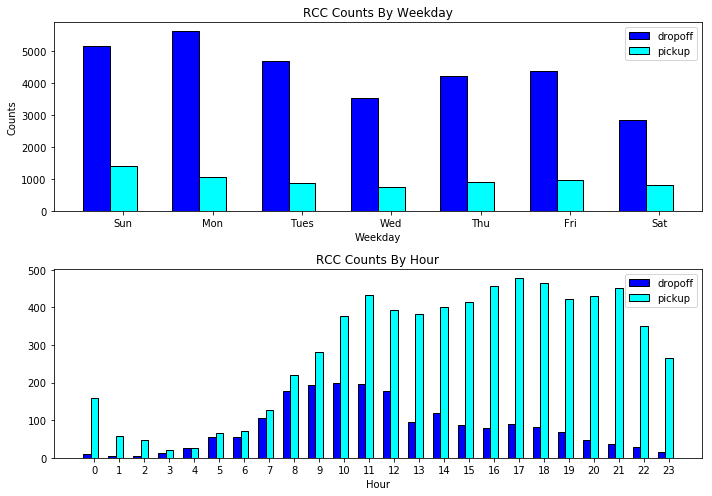

In [500]:
import pylab #To adjust the figures for the plots
####### RCC BAR PLOTS ##########

# Let's make this a big figure, because there are 2 subplots
pylab.rcParams['figure.figsize'] = (10.0, 7.0)

# Size of Bars
BarWidth = 0.3

#Height of Blue Bars (dropoff)
RWBars1 = [5166, 5622, 4685, 3539, 4213, 4375, 2867]
RHBars1 = [9, 6, 4, 14, 27, 54, 55, 105, 178, 194, 199, 196, 178, 94, 118, 86, 80, 90, 81, 69, 48, 36, 28, 15]

#Height of cyan bars (pickup)
RWBars2 = [1414, 1057, 878, 764, 906, 962, 811]
RHBars2 = [159, 57, 47, 21, 27, 66, 70, 128, 221, 281, 377, 432, 393, 381, 401, 415, 456, 478, 464, 421, 429, 451, 351, 266]

#X axis - position of bars
RW1 = np.arange(len(RWBars1))
RW2 = [x + BarWidth for x in RW1]

RH1 = np.arange(len(RHBars1))
RH2 = [x + BarWidth for x in RH1]

#### 1st subplot - counts by weekday
plt.subplot(2, 1, 1)
plt.bar(RW1, RWBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(RW2, RWBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(RWBars1))], ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Counts')
plt.xlabel('Weekday')
plt.title('RCC Counts By Weekday')
plt.legend()
plt.tight_layout()
#### 2nd subplot - counts by hour
plt.subplot(2, 1, 2)
plt.bar(RH1, RHBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(RH2, RHBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(RHBars1))], ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                                                    '16','17','18','19','20','21','22','23'])
plt.xlabel('Hour')
plt.title('RCC Counts By Hour')
plt.legend()
plt.tight_layout()

#Plot graph
plt.show()

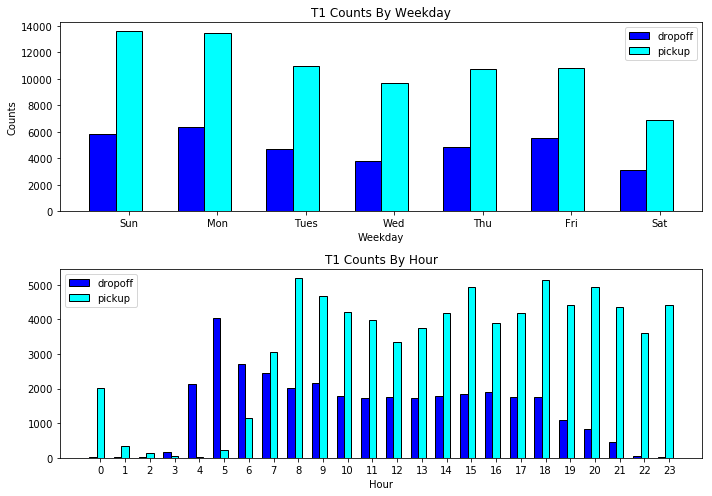

In [501]:
################ T1 Bar Plots #######################

# Let's make this a big figure, because there are 2 subplots
pylab.rcParams['figure.figsize'] = (10.0, 7.0)

# Size of Bars
BarWidth = 0.3

#Height of Blue Bars (dropoff)
T1WBars1 = [5860, 6368, 4731, 3773, 4819, 5514, 3108]
T1HBars1 = [13,14,13,170,2123,4050,2715,2436,2030,2156,1787,1717,1744,1738,1786,1830,1890,1750,1769,1100,819,454,53,16]

#Height of cyan bars (pickup)
T1WBars2 = [13579, 13486, 10999, 9675, 10730, 10778, 6916]
T1HBars2 = [2007,330,137,55,15,237,1136,3057,5195,4674,4200,3976,3338,3745,4193,4943,3890,4175,5132,4419,4933,4356,3609,4411]

#X axis - position of bars
T1W1 = np.arange(len(T1WBars1))
T1W2 = [x + BarWidth for x in T1W1]

T1H1 = np.arange(len(T1HBars1))
T1H2 = [x + BarWidth for x in T1H1]

#### 1st subplot - counts by weekday
plt.subplot(2, 1, 1)
plt.bar(T1W1, T1WBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(T1W2, T1WBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(T1WBars1))], ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Counts')
plt.xlabel('Weekday')
plt.title('T1 Counts By Weekday')
plt.legend()
plt.tight_layout()
#### 2nd subplot - counts by hour
plt.subplot(2, 1, 2)
plt.bar(T1H1, T1HBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(T1H2, T1HBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(T1HBars1))], ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                                                    '16','17','18','19','20','21','22','23'])
plt.xlabel('Hour')
plt.title('T1 Counts By Hour')
plt.legend()
plt.tight_layout()

#Plot graph
plt.show()

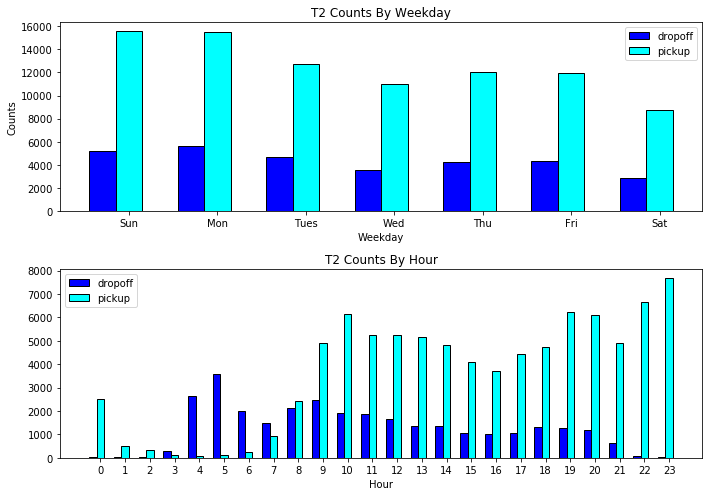

In [502]:
################ T2 Bar Plots #######################

# Let's make this a big figure, because there are 2 subplots
pylab.rcParams['figure.figsize'] = (10.0, 7.0)

# Size of Bars
BarWidth = 0.3

#Height of Blue Bars (dropoff)
T2WBars1 = [5166, 5622, 4685, 3539, 4213, 4375, 2867]
T2HBars1 = [22,14,20,289,2640,3563,2016,1504,2121,2486,1931,1871,1675,1361,1345,1069,1024,1039,1309,1283,1167,622,67,29]

#Height of cyan bars (pickup)
T2WBars2 = [15542, 15456, 12708, 10981, 12073, 11904, 8722]
T2HBars2 = [2506,504,317,129,70,103,259,929,2432,4906,6162,5268,5260,5178,4826,4092,3708,4450,4744,6247,6084,4888,6640,7684]

#X axis - position of bars
T2W1 = np.arange(len(T2WBars1))
T2W2 = [x + BarWidth for x in T2W1]

T2H1 = np.arange(len(T2HBars1))
T2H2 = [x + BarWidth for x in T2H1]

#### 1st subplot - counts by weekday
plt.subplot(2, 1, 1)
plt.bar(T2W1, T2WBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(T2W2, T2WBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(T2WBars1))], ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Counts')
plt.xlabel('Weekday')
plt.title('T2 Counts By Weekday')
plt.legend()
plt.tight_layout()
#### 2nd subplot - counts by hour
plt.subplot(2, 1, 2)
plt.bar(T2H1, T2HBars1, width = BarWidth, color = 'blue', edgecolor = 'black', label = 'dropoff')  #Create Blue Bars (dropoff)
plt.bar(T2H2, T2HBars2, width = BarWidth, color = 'cyan', edgecolor = 'black', label = 'pickup')  #Create Cyan Bars (pickup)
#Overall layout
plt.xticks([r + BarWidth for r in range(len(T2HBars1))], ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                                                    '16','17','18','19','20','21','22','23'])
plt.xlabel('Hour')
plt.title('T2 Counts By Hour')
plt.legend()
plt.tight_layout()

#Plot graph
plt.show()

### Now drill down some more and find out how many pickups and dropoffs occurred between 2pm-3pm on Tuesday at Terminal 1.

In [503]:
T1_Tuesday = T1[T1['Weekday'] == 'Tuesday']

In [504]:
T1_Tuesday #verify the data reflect activity on Tuesday at Terminal 1

,Trip Counter,Transaction Type,PickupDropoffDateTime,EntryDateTime,ExitDateTime,Latitude,Longitude,License Plate,Vehicle Year,Vehicle Make,Vehicle Model,MPG,Multi-party Trip,MatchedRide,Is Rematch,NumberOfParties,Terminal,Weekday,Hour
12951,12952,pickup,2018-07-03 00:09:00,2018-07-03 00:00:00,2018-07-03 00:13:00,32.731815,-117.197614,305,2016,toyota,corolla,31.0,no,no,no,NaN,T1,Tuesday,0.0
12963,12964,pickup,2018-07-03 00:13:00,2018-07-03 00:04:00,2018-07-03 00:18:00,32.732009,-117.197568,638,2015,chevrolet,malibu,27.0,no,no,no,NaN,T1,Tuesday,0.0
12966,12967,pickup,2018-07-03 00:15:00,2018-07-03 00:03:00,2018-07-03 00:19:00,32.731818,-117.197536,133,2009,nissan,sentra,26.0,no,no,no,NaN,T1,Tuesday,0.0
12971,12972,pickup,2018-07-03 00:17:00,2018-07-03 00:06:00,2018-07-03 00:20:00,32.731924,-117.197840,951,2012,kia,optima,27.0,no,no,no,NaN,T1,Tuesday,0.0
12973,12974,pickup,2018-07-03 00:17:00,2018-07-03 00:02:00,2018-07-03 00:20:00,32.731876,-117.197903,243,2015,acura,ilx,27.0,no,no,no,NaN,T1,Tuesday,0.0
12976,12977,pickup,2018-07-03 00:17:00,2018-07-03 00:07:00,2018-07-03 00:22:00,32.731985,-117.197481,659,2018,toyota,corolla,31.0,no,no,no,NaN,T1,Tuesday,0.0
12978,12979,pickup,2018-07-03 00:17:00,2018-07-03 00:12:00,2018-07-03 00:22:00,32.731440,-117.197728,319,2017,honda,civic,34.0,no,no,no,NaN,T1,Tuesday,0.0
12982,12983,pickup,2018-07-03 00:18:00,2018-07-03 00:13:00,2018-07-03 00:23:00,32.731783,-117.197455,751,2016,nissan,sentra,31.0,no,no,no,NaN,T1,Tuesday,0.0
12983,12984,pickup,2018-07-03 00:19:00,2018-07-03 00:05:00,2018-07-03 00:23:00,32.731709,-117.197247,72,2017,toyota,prius,52.0,no,no,no,NaN,T1,Tuesday,0.0
12984,12985,pickup,2018-07-03 00:19:00,2018-07-03 00:11:00,2018-07-03 00:23:00,32.731865,-117.197835,6,2015,chevrolet,malibu,27.0,no,no,no,NaN,T1,Tuesday,0.0


In [505]:
T1_TuesdayTrips = T1_Tuesday.loc[:,['Transaction Type','EntryDateTime', 'Hour']] #Condense; only look at columns we need

In [506]:
T1_TuesdayGroup = T1_TuesdayTrips.groupby(['Hour', 'Transaction Type']) #Group Tuesday trips by Hour and Transaction Type

In [507]:
T1_TuesdayCountsByHour = T1_TuesdayGroup.count()

In [508]:
T1_TuesdayCountsByHour

EntryDateTime
Hour Transaction Type               
0.0  dropoff                       2
     pickup                      411
1.0  dropoff                       3
     pickup                       81
2.0  pickup                       35
3.0  dropoff                      19
     pickup                       20
4.0  dropoff                     298
5.0  dropoff                     573
     pickup                       32
6.0  dropoff                     427
     pickup                      175
7.0  dropoff                     346
     pickup                      426
8.0  dropoff                     291
     pickup                      762
9.0  dropoff                     285
     pickup                      756
10.0 dropoff                     220
     pickup                      535
11.0 dropoff                     228
     pickup                      577
12.0 dropoff                     218
     pickup                      493
13.0 dropoff                     258
     pickup                      543
14.0 dropoff                     239
     pickup                      630
15.0 dropoff                     272
     pickup                      662
16.0 dropoff                     279
     pickup                      631
17.0 dropoff                     261
     pickup                      618
18.0 dropoff                     242
     pickup                      727
19.0 dropoff                     134
     pickup                      683
20.0 dropoff                      85
     pickup                      663
21.0 dropoff                      44
     pickup                      609
22.0 dropoff                       5
     pickup                      428
23.0 dropoff                       2
     pickup                      502

### Based on above, here is the trip breakdown for 2pm on Tuesdays at Terminal 1:
-Dropoffs:  239
-Pickups:  630

### Let's visualize the trip distribution on a map.

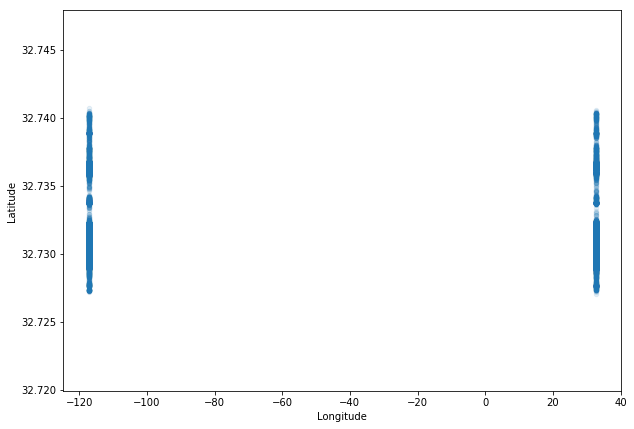

In [509]:
july2018.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

### Looks like we got some longitude coordinates.  Let's omit them from the data set and rerun the map.

In [510]:
july2018_truncated = july2018[(july2018['Longitude'] < -117) & (july2018['Longitude'] > -118)]

In [511]:
july2018.shape

(359642, 19)

In [512]:
july2018_truncated.shape

(239935, 19)

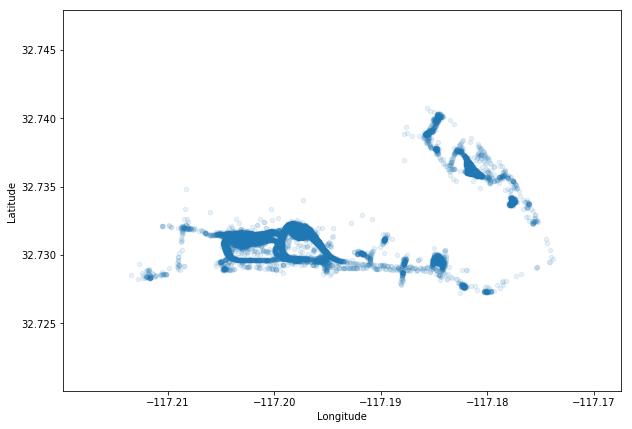

In [513]:
july2018_truncated.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

### Much better!  Lets omit RCC and Other points from the data set.

In [514]:
july2018_truncated.columns

Index(['Trip Counter', 'Transaction Type', 'PickupDropoffDateTime',
       'EntryDateTime', 'ExitDateTime', 'Latitude', 'Longitude',
       'License Plate', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'MPG',
       'Multi-party Trip', 'MatchedRide', 'Is Rematch', 'NumberOfParties',
       'Terminal', 'Weekday', 'Hour'],
      dtype='object')

In [515]:
july2018_truncated_T1T2 = july2018_truncated[(july2018_truncated['Terminal'] != 'RCC') & (july2018['Terminal'] != 'Other')]

C:\Users\imc\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [516]:
july2018_truncated_T1T2.shape

(229414, 19)

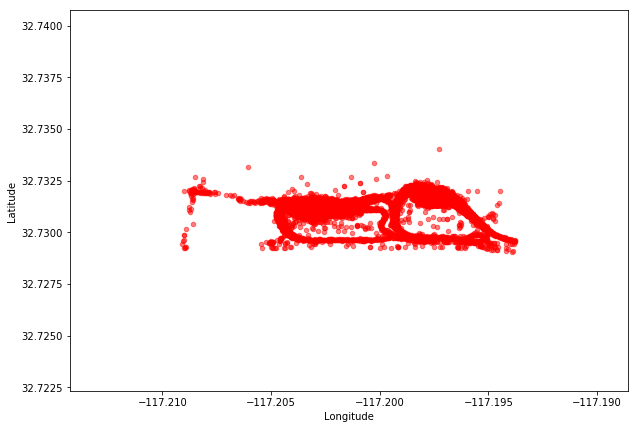

In [517]:
july2018_truncated_T1T2.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.5, color='red')

### Very Nice.  With this plot, we able to zoom in on Terminal 1 and Terminal 2.